# LQCD_Visualization_V
----

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go

## Load the LQCD sim data

### Taking care of fermion fields data

In [39]:
# Load the fermion field data as a pandas DataFrame
def load_fermion_fields_as_dataframe(filename):
    # Read the file
    with open(filename) as f:
        data = f.read().split()

    # Convert to a NumPy array of floats
    data = np.array(data, dtype=float)

    # Ensure the length of the data is divisible by 7 (fermion data has 7 columns)
    if len(data) % 7 != 0:
        print(f"Warning: Data length ({len(data)}) is not divisible by 7. Truncating excess elements.")
        data = data[:len(data) - (len(data) % 7)]  # Truncate excess data

    # Reshape the data into rows of 7 columns
    data = data.reshape(-1, 7)

    # Create a DataFrame with appropriate column names
    columns = ['x', 'y', 'z', 't', 'i', 'real_psi', 'imag_psi']
    df_fermion = pd.DataFrame(data, columns=columns)

    return df_fermion

In [40]:
# File paths
fermion_field_file = "fermion_fields.txt"

# Load the data as pd dataframe
df_fermion = load_fermion_fields_as_dataframe(fermion_field_file)
print("\nFermion Fields DataFrame:")
print(df_fermion.head())


Fermion Fields DataFrame:
          x         y         z         t         i  real_psi  imag_psi
0  1.000000  1.000000  1.000000  1.000000  0.006549  0.006549  1.000000
1  1.000000  1.000000  1.000000  0.919020  0.919020  1.000000  1.000000
2  1.000000  1.000000  0.062001  0.062001  1.000000  1.000000  1.000000
3  2.000000  0.653101  0.653101  1.000000  1.000000  1.000000  2.000000
4  0.141397  0.141397  1.000000  1.000000  1.000000  2.000000  0.654712


In [41]:
print(df_fermion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25714 entries, 0 to 25713
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x         25714 non-null  float64
 1   y         25714 non-null  float64
 2   z         25714 non-null  float64
 3   t         25714 non-null  float64
 4   i         25714 non-null  float64
 5   real_psi  25714 non-null  float64
 6   imag_psi  25714 non-null  float64
dtypes: float64(7)
memory usage: 1.4 MB
None


In [4]:
x_fermion = df_fermion.iloc[:,0:].values
y_fermion = df_fermion.iloc[:,1:].values
z_fermion = df_fermion.iloc[:,2:].values
real_ps = df_fermion.iloc[:,5:].values
imag_psi = df_fermion.iloc[:,6:].values

### Taking care of bosonic field data

In [42]:
# Load the gauge field data as a pandas DataFrame
def load_gauge_fields_as_dataframe(filename):
    # Read the file
    with open(filename) as f:
        data = f.read().split()

    # Convert to a NumPy array of floats
    data = np.array(data, dtype=float)

    # Ensure the length of the data is divisible by 12 (gauge data has 12 columns)
    data = data[:len(data) - (len(data) % 12)]  # Truncate excess data silently

    # Reshape the data into rows of 12 columns
    data = data.reshape(-1, 12)

    # Create a DataFrame with appropriate column names
    columns = ['x', 'y', 'z', 't', 'i', 'j', 'real_U1', 'imag_U1', 'real_U2', 'imag_U2', 'real_U3', 'imag_U3']
    df_gauge = pd.DataFrame(data, columns=columns)

    return df_gauge

In [43]:
gauge_field_file = "gauge_fields.txt"

# Load the data into pd dataframes

df_gauge = load_gauge_fields_as_dataframe(gauge_field_file)

print("\nGauge Fields DataFrame:")
print(df_gauge.head())


Gauge Fields DataFrame:
     x         y         z         t         i         j   real_U1   imag_U1  \
0  1.0  1.000000  1.000000  1.000000  1.000000  1.097088  0.097088  1.048328   
1  1.0  1.000000  1.000000  1.000000  0.095407  0.095407  0.096812  0.096812   
2  1.0  1.000000  1.000000  0.006067  0.006067  0.042016  0.042016  0.042381   
3  1.0  2.000000  0.063325  0.063325  0.095817  0.095817  0.053152  0.053152   
4  2.0  1.069065  0.069065  1.080335  0.080335  1.000521  0.000521  1.000000   

    real_U2   imag_U2   real_U3  imag_U3  
0  0.048328  1.018106  0.018106      1.0  
1  0.060302  0.060302  1.000000      1.0  
2  0.042381  1.000000  1.000000      1.0  
3  1.000000  1.000000  1.000000      1.0  
4  1.000000  1.000000  1.000000      2.0  


In [52]:
x_gauge = df_gauge.iloc[:,0:].values
y_gauge = df_gauge.iloc[:,1:].values
z_gauge = df_gauge.iloc[:,2:].values
real_U = df_gauge.iloc[:,6:].values
imag_U = df_gauge.iloc[:,7:].values
df_gauge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        8000 non-null   float64
 1   y        8000 non-null   float64
 2   z        8000 non-null   float64
 3   t        8000 non-null   float64
 4   i        8000 non-null   float64
 5   j        8000 non-null   float64
 6   real_U1  8000 non-null   float64
 7   imag_U1  8000 non-null   float64
 8   real_U2  8000 non-null   float64
 9   imag_U2  8000 non-null   float64
 10  real_U3  8000 non-null   float64
 11  imag_U3  8000 non-null   float64
dtypes: float64(12)
memory usage: 750.1 KB


## Visualization of Lattice

In [30]:
# Convert t to integer time steps to make them suitable for animation
df_fermion['t'] = (df_fermion['t'] * 10).astype(int)
df_gauge['t'] = (df_gauge['t'] * 10).astype(int)
# Create the animation frames for fermion and gauge fields
frames = []

for time_step in sorted(df_fermion['t'].unique()):
    fermion_subset = df_fermion[df_fermion['t'] == time_step]
    gauge_subset = df_gauge[df_gauge['t'] == time_step]

    frames.append(
        go.Frame(
            data=[
                go.Scatter3d(
                    x=fermion_subset['x_fermion'],
                    y=fermion_subset['y_fermion'],
                    z=fermion_subset['z_fermion'],
                    mode='markers',
                    marker=dict(
                        size=5,
                        color=fermion_subset['real_psi'],
                        colorscale='Plasma',
                        opacity=0.8
                    ),
                    name='Fermion Fields'
                ),
                go.Scatter3d(
                    x=gauge_subset['x'],
                    y=gauge_subset['y'],
                    z=gauge_subset['z'],
                    mode='markers',
                    marker=dict(
                        size=5,
                        color=gauge_subset['real_U1'],
                        colorscale='Viridis',
                        opacity=0.8
                    ),
                    name='Gauge Fields'
                )
            ],
            name=f'Time {time_step}'
        )
    )

# Create the initial figure
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['x_fermion'],
            y=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['y_fermion'],
            z=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['z_fermion'],
            mode='markers',
            marker=dict(
                size=5,
                color=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['real_psi'],
                colorscale='Plasma',
                opacity=0.8
            ),
            name='Fermion Fields'
        ),
        go.Scatter3d(
            x=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['x'],
            y=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['y'],
            z=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['z'],
            mode='markers',
            marker=dict(
                size=5,
                color=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['real_U1'],
                colorscale='Viridis',
                opacity=0.8
            ),
            name='Gauge Fields'
        )
    ],
    layout=go.Layout(
        title='Evolution of Lattice QCD Fields',
        scene=dict(
            xaxis=dict(title='X'),
            yaxis=dict(title='Y'),
            zaxis=dict(title='Z')
        ),
        updatemenus=[dict(
            type='buttons',
            showactive=False,
            buttons=[dict(label='Play',
                          method='animate',
                          args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)])]
        )]
    ),
    frames=frames
)

fig.show()


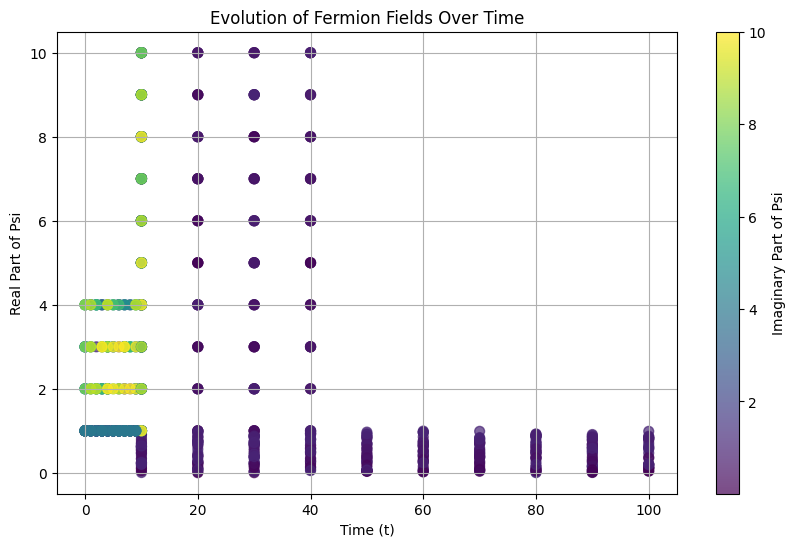

In [31]:
# Function to compute the Polyakov loop from gauge field data
def compute_polyakov_loop(df_gauge):
    # Extract relevant columns
    grouped = df_gauge.groupby(['x', 'y', 'z'])

    # Polyakov loop dictionary
    polyakov_loops = {}

    for name, group in grouped:
        # Filter by direction mu=4 (t-direction), assuming 4 is the temporal direction
        t_data = group[group['t'] == 1.0]  # Consider using df_gauge['t'] if temporal evolution
        # Sum over all 'U' fields for t-direction to compute the Polyakov loop
        # For demonstration purposes, assume real_U1, imag_U1 are relevant
        real_sum = t_data['real_U1'].sum()
        imag_sum = t_data['imag_U1'].sum()
        # Calculate magnitude of the Polyakov loop
        polyakov_loop = np.sqrt(real_sum**2 + imag_sum**2)
        polyakov_loops[name] = polyakov_loop

    return polyakov_loops

# Compute Polyakov loops
polyakov_loops = compute_polyakov_loop(df_gauge)

# Convert Polyakov loop results into a DataFrame for plotting
df_polyakov = pd.DataFrame(polyakov_loops.items(), columns=['Lattice Point', 'Polyakov Loop Magnitude'])

# Visualize Polyakov loop using 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=[x[0] for x in df_polyakov['Lattice Point']],
    y=[x[1] for x in df_polyakov['Lattice Point']],
    z=[x[2] for x in df_polyakov['Lattice Point']],
    mode='markers',
    marker=dict(size=5, color=df_polyakov['Polyakov Loop Magnitude'], colorscale='Viridis', opacity=0.8),
    text=[f"Polyakov Loop: {pl:.3f}" for pl in df_polyakov['Polyakov Loop Magnitude']]
)])

fig.update_layout(
    title="Polyakov Loop Distribution on the Lattice",
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z')
)
fig.show()

# Visualizing the evolution of fermion fields
plt.figure(figsize=(10, 6))
plt.scatter(df_fermion['t'], df_fermion['real_psi'], c=df_fermion['imag_psi'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Imaginary Part of Psi')
plt.xlabel('Time (t)')
plt.ylabel('Real Part of Psi')
plt.title('Evolution of Fermion Fields Over Time')
plt.grid(True)
plt.show()

# Visualizing the gauge fields on the lattice
fig_gauge = go.Figure(data=[go.Scatter3d(
    x=df_gauge['x'], y=df_gauge['y'], z=df_gauge['z'],
    mode='markers',
    marker=dict(size=5, color=df_gauge['real_U1'], colorscale='Inferno', opacity=0.8),
    text=[f"Gauge Field U1 (Real): {val:.3f}" for val in df_gauge['real_U1']]
)])

fig_gauge.update_layout(
    title="Gauge Field Distribution on the Lattice",
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z')
)
fig_gauge.show()


In [77]:
# Visualizing the evolution of the Lattice QCD simulation and demonstrate the Polyakov loop modeling
# Calculate Polyakov loop from gauge fields for demonstration  over MC's virtuous time
def calculate_polyakov_loop(df_gauge):
    polyakov_loops = df_gauge.groupby(['x', 'y', 'z']).apply(
        lambda group: np.mean(np.exp(1j * (group['real_U1'] + 1j * group['imag_U1'])))
    ).reset_index(name='Polyakov Loop')
    return polyakov_loops

# Compute Polyakov loop
df_polyakov = calculate_polyakov_loop(df_gauge)

# Prepare figure for animation
fig = go.Figure()

# Add Fermion Fields Animation
for t_val in df_fermion['t'].unique():
    df_fermion_t = df_fermion[df_fermion['t'] == t_val]
    fig.add_trace(go.Scatter3d(
        x=df_fermion_t['x'],
        y=df_fermion_t['y'],
        z=df_fermion_t['z'],
        mode='markers',
        marker=dict(size=4, color=df_fermion_t['real_psi'], colorscale='Plasma', opacity=0.8),
        name=f'Fermion Fields t={t_val}',
        visible=False
    ))

# Add Polyakov Loop Animation
for t_val in df_gauge['t'].unique():
    df_gauge_t = df_gauge[df_gauge['t'] == t_val]
    df_polyakov_t = df_polyakov[df_polyakov.index.isin(df_gauge_t.index)]
    fig.add_trace(go.Scatter3d(
        x=df_polyakov_t['x'],
        y=df_polyakov_t['y'],
        z=df_polyakov_t['z'],
        mode='markers',
        marker=dict(size=4, color=np.angle(df_polyakov_t['Polyakov Loop']), colorscale='Viridis', opacity=0.8),
        name=f'Polyakov Loop t={t_val}',
        visible=False
    ))

# Set the first frame to be visible
fig.data[0].visible = True
fig.data[len(df_fermion['t'].unique())].visible = True

# Set up animation frames
frames = [
    go.Frame(data=[
        go.Scatter3d(
            x=df_fermion[df_fermion['t'] == t_val]['x'],
            y=df_fermion[df_fermion['t'] == t_val]['y'],
            z=df_fermion[df_fermion['t'] == t_val]['z'],
            mode='markers',
            marker=dict(size=4, color=df_fermion[df_fermion['t'] == t_val]['real_psi'], colorscale='Plasma', opacity=0.8)
        ),
        go.Scatter3d(
            x=df_polyakov[df_polyakov.index.isin(df_gauge[df_gauge['t'] == t_val].index)]['x'],
            y=df_polyakov[df_polyakov.index.isin(df_gauge[df_gauge['t'] == t_val].index)]['y'],
            z=df_polyakov[df_polyakov.index.isin(df_gauge[df_gauge['t'] == t_val].index)]['z'],
            mode='markers',
            marker=dict(size=4, color=np.angle(df_polyakov[df_polyakov.index.isin(df_gauge[df_gauge['t'] == t_val].index)]['Polyakov Loop']), colorscale='Viridis', opacity=0.8)
        )
    ], name=f'frame_{t_val}')
    for t_val in df_fermion['t'].unique()
]

fig.update_layout(
    updatemenus=[dict(type='buttons', showactive=False,
                      buttons=[dict(label='Play',
                                    method='animate',
                                    args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)])])],
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'),
    title='Lattice QCD Evolution - Fermion Fields and Polyakov Loop'
)

fig.frames = frames
fig.write_html("lattice_qcd_animatio_v.html")

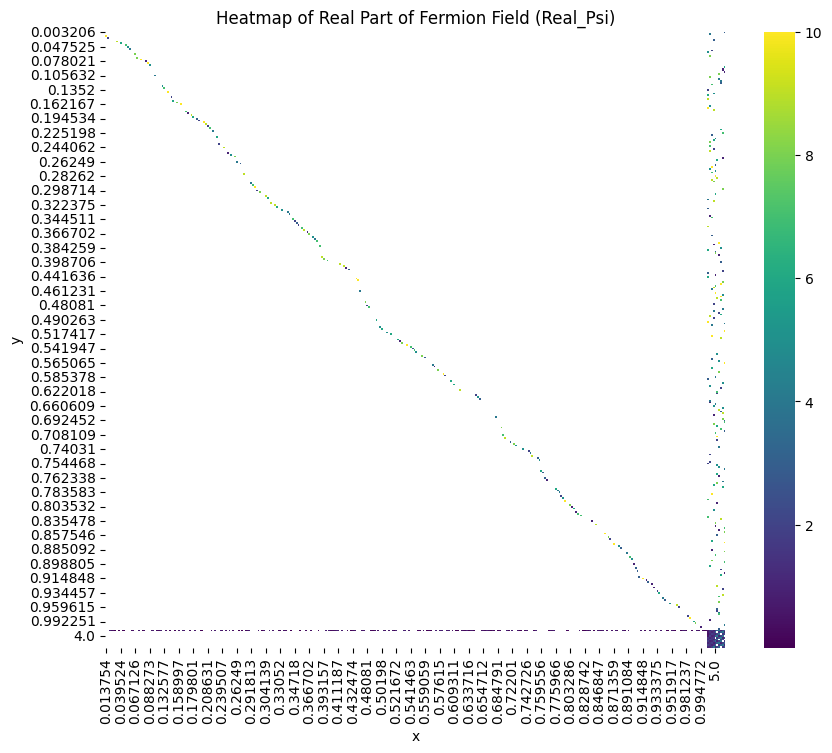

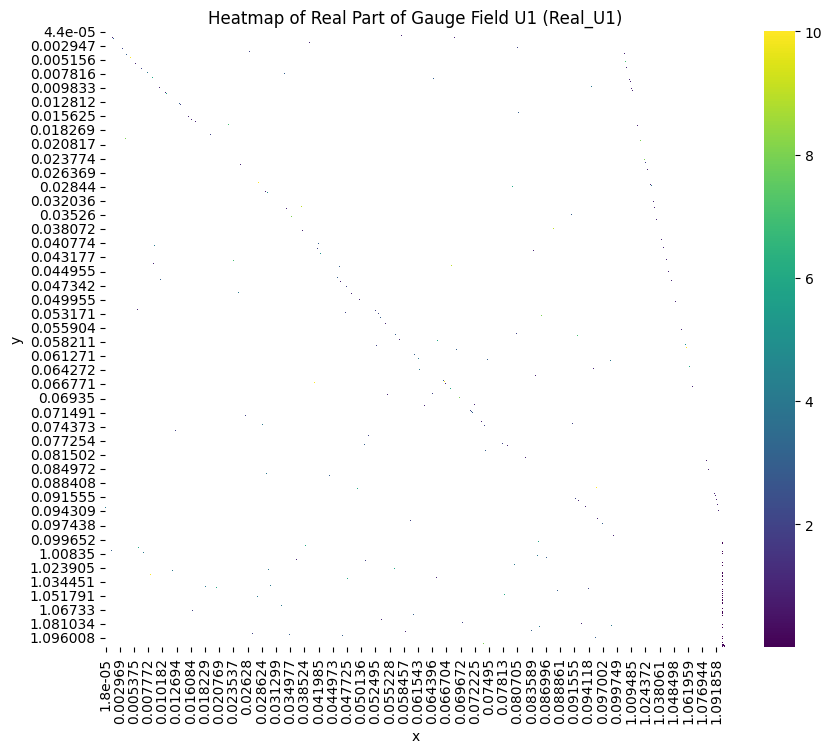

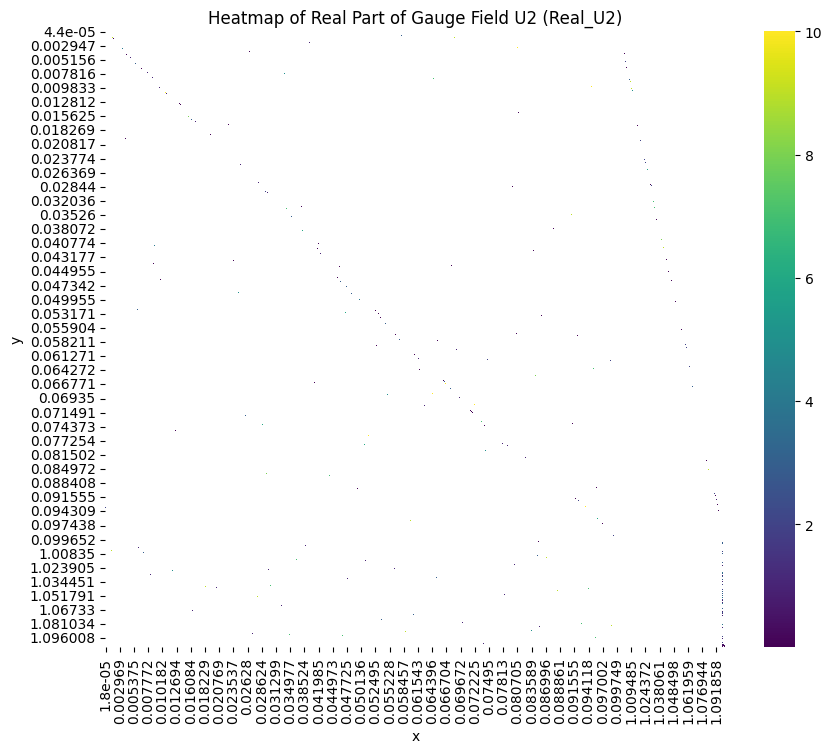

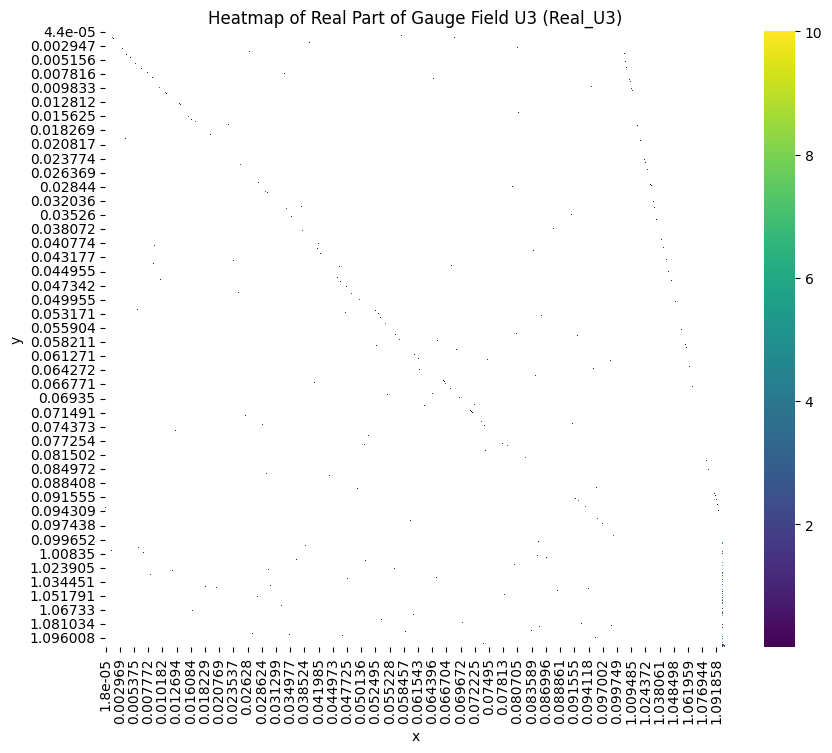

In [8]:
# Function to plot a heatmap
def plot_heatmap(data, x, y, z, title):
    plt.figure(figsize=(10, 8))
    heatmap_data = data.pivot_table(index=y, columns=x, values=z)
    sns.heatmap(heatmap_data, cmap="viridis", annot=False)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

# Plotting heatmap for the real part of fermion field
plot_heatmap(df_fermion, x='x', y='y', z='real_psi', title='Heatmap of Real Part of Fermion Field (Real_Psi)')

# Plotting heatmap for the real part of gauge field U1
plot_heatmap(df_gauge, x='x', y='y', z='real_U1', title='Heatmap of Real Part of Gauge Field U1 (Real_U1)')

# Plotting heatmap for the real part of gauge field U2
plot_heatmap(df_gauge, x='x', y='y', z='real_U2', title='Heatmap of Real Part of Gauge Field U2 (Real_U2)')

# Plotting heatmap for the real part of gauge field U3
plot_heatmap(df_gauge, x='x', y='y', z='real_U3', title='Heatmap of Real Part of Gauge Field U3 (Real_U3)')


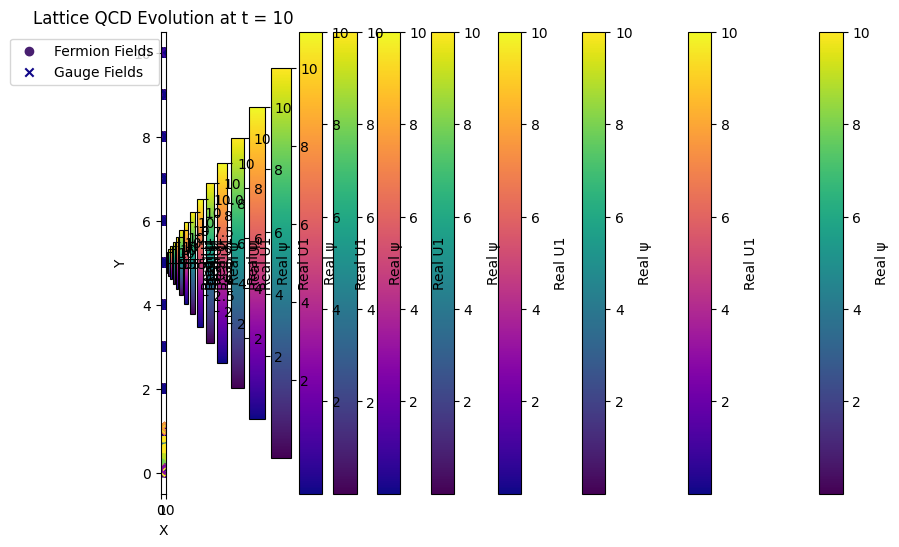

In [16]:
# Paquettes and evolution: the animation that demonstrates the evolution of the Lattice QCD and plaquettes
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Function to update the frame
def update(frame):
    ax.clear()
    # Update fermion field plot
    df_fermion_t = df_fermion[df_fermion['t'] == frame]
    scatter_fermion = ax.scatter(df_fermion_t['x'], df_fermion_t['y'], c=df_fermion_t['real_psi'], cmap='viridis', label='Fermion Fields')

    # Update gauge field plot
    df_gauge_t = df_gauge[df_gauge['t'] == frame]
    scatter_gauge = ax.scatter(df_gauge_t['x'], df_gauge_t['y'], c=df_gauge_t['real_U1'], cmap='plasma', label='Gauge Fields', marker='x')

    # Add color bar and labels
    fig.colorbar(scatter_fermion, ax=ax, label='Real ψ')
    fig.colorbar(scatter_gauge, ax=ax, label='Real U1')
    ax.set_title(f'Lattice QCD Evolution at t = {frame}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

# Create the animation
num_frames = int(df_fermion['t'].max())
ani = animation.FuncAnimation(fig, update, frames=np.arange(1, num_frames + 1), repeat=False)

# Save the animation
ani.save('lattice_qcd_evolution_vv.mp4', writer='ffmpeg', fps=2)

plt.show()


In [56]:
# Fermion Fields Evolution
fig_fermion = go.Figure()

# Add initial data
fig_fermion.add_trace(go.Scatter3d(
    x=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['x'],
    y=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['y'],
    z=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['z'],
    mode='markers',
    marker=dict(size=4, color=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['real_psi'], colorscale='Viridis', opacity=0.8)
))

# Define frames
frames_fermion = [go.Frame(
    data=[go.Scatter3d(
        x=df_fermion[df_fermion['t'] == t]['x'],
        y=df_fermion[df_fermion['t'] == t]['y'],
        z=df_fermion[df_fermion['t'] == t]['z'],
        mode='markers',
        marker=dict(size=4, color=df_fermion[df_fermion['t'] == t]['real_psi'], colorscale='Viridis', opacity=0.8)
    )],
    name=f'Fermion Fields at t={t}'
) for t in sorted(df_fermion['t'].unique())]

fig_fermion.frames = frames_fermion

# Update layout with play button and slider
fig_fermion.update_layout(
    title='Fermion Fields Evolution',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    updatemenus=[dict(type='buttons', showactive=False,
                      buttons=[dict(label='Play',
                                    method='animate',
                                    args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)])])],
    sliders=[dict(
        active=0,
        steps=[dict(label=str(t),
                    method='animate',
                    args=[[f'Fermion Fields at t={t}'], dict(frame=dict(duration=500, redraw=True), mode='immediate')])
               for t in sorted(df_fermion['t'].unique())]
    )]
)

fig_fermion.write_html("Fermion_fields_evolution_WF.html")

In [57]:
# guage evolution
fig_gauge = go.Figure()

# initial data
fig_gauge.add_trace(go.Scatter3d(
    x=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['x'],
    y=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['y'],
    z=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['z'],
    mode='markers',
    marker=dict(size=4, color=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['real_U1'], colorscale='Viridis', opacity=0.8)
))

# Define frames
frames_gauge = [go.Frame(
    data=[go.Scatter3d(
        x=df_gauge[df_gauge['t'] == t]['x'],
        y=df_gauge[df_gauge['t'] == t]['y'],
        z=df_gauge[df_gauge['t'] == t]['z'],
        mode='markers',
        marker=dict(size=4, color=df_gauge[df_gauge['t'] == t]['real_U1'], colorscale='Viridis', opacity=0.8)
    )],
    name=f'Gauge Fields at t={t}'
) for t in sorted(df_gauge['t'].unique())]

fig_gauge.frames = frames_gauge

# Update layout
fig_gauge.update_layout(
    title='Gauge Fields Evolution',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    updatemenus=[dict(type='buttons', showactive=False,
                      buttons=[dict(label='Play',
                                    method='animate',
                                    args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)])])],
    sliders=[dict(
        active=0,
        steps=[dict(label=str(t),
                    method='animate',
                    args=[[f'Gauge Fields at t={t}'], dict(frame=dict(duration=500, redraw=True), mode='immediate')])
               for t in sorted(df_gauge['t'].unique())]
    )]
)

fig_gauge.write_html("Gauge_fields_evolution_WF.html")



In [50]:
# down sizeing 4 BM
df_fermion = df_fermion_com[0:100]
df_gauge = df_gauge_com[0:322]

fig_fermion = go.Figure()

fig_fermion.add_trace(go.Scatter3d(
    x=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['x'],
    y=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['y'],
    z=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['z'],
    mode='markers',
    marker=dict(size=4, color=df_fermion[df_fermion['t'] == df_fermion['t'].min()]['real_psi'], colorscale='Viridis', opacity=0.8)
))

frames_fermion = [go.Frame(
    data=[go.Scatter3d(
        x=df_fermion[df_fermion['t'] == t]['x'],
        y=df_fermion[df_fermion['t'] == t]['y'],
        z=df_fermion[df_fermion['t'] == t]['z'],
        mode='markers',
        marker=dict(size=4, color=df_fermion[df_fermion['t'] == t]['real_psi'], colorscale='Viridis', opacity=0.8)
    )],
    name=f'Fermion Fields at t={t}'
) for t in sorted(df_fermion['t'].unique())]

fig_fermion.frames = frames_fermion

# Update play button and slider xxx fixed
fig_fermion.update_layout(
    title='Fermion Fields Evolution',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    updatemenus=[dict(type='buttons', showactive=False,
                      buttons=[dict(label='Play',
                                    method='animate',
                                    args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)])])],
    sliders=[dict(
        active=0,
        steps=[dict(label=str(t),
                    method='animate',
                    args=[[f'Fermion Fields at t={t}'], dict(frame=dict(duration=500, redraw=True), mode='immediate')])
               for t in sorted(df_fermion['t'].unique())]
    )]
)

# anim for Gauge Fields
fig_gauge = go.Figure()

# adding initial data
fig_gauge.add_trace(go.Scatter3d(
    x=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['x'],
    y=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['y'],
    z=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['z'],
    mode='markers',
    marker=dict(size=4, color=df_gauge[df_gauge['t'] == df_gauge['t'].min()]['real_U1'], colorscale='Viridis', opacity=0.8)
))

# Define frames
frames_gauge = [go.Frame(
    data=[go.Scatter3d(
        x=df_gauge[df_gauge['t'] == t]['x'],
        y=df_gauge[df_gauge['t'] == t]['y'],
        z=df_gauge[df_gauge['t'] == t]['z'],
        mode='markers',
        marker=dict(size=4, color=df_gauge[df_gauge['t'] == t]['real_U1'], colorscale='Viridis', opacity=0.8)
    )],
    name=f'Gauge Fields at t={t}'
) for t in sorted(df_gauge['t'].unique())]

fig_gauge.frames = frames_gauge

# Update layout with play button xxx fixed
fig_gauge.update_layout(
    title='Gauge Fields Evolution',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    updatemenus=[dict(type='buttons', showactive=False,
                      buttons=[dict(label='Play',
                                    method='animate',
                                    args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)])])],
    sliders=[dict(
        active=0,
        steps=[dict(label=str(t),
                    method='animate',
                    args=[[f'Gauge Fields at t={t}'], dict(frame=dict(duration=500, redraw=True), mode='immediate')])
               for t in sorted(df_gauge['t'].unique())]
    )]
)

fig_fermion.write_html("A_fermion_fields_evolution_BM4.html")
fig_gauge.write_html("A_gauge_fields_evolution_BM4.html")



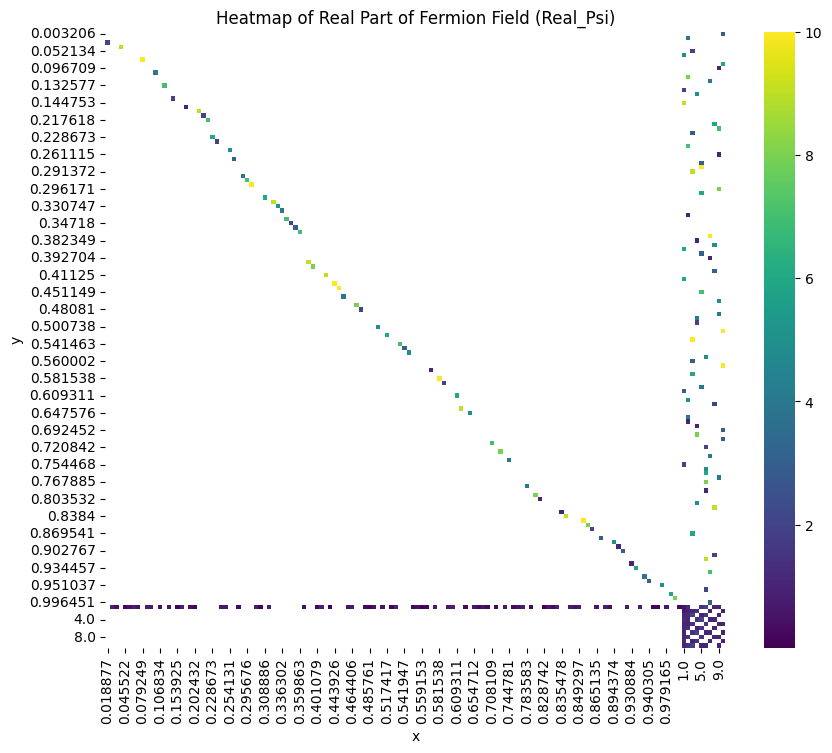

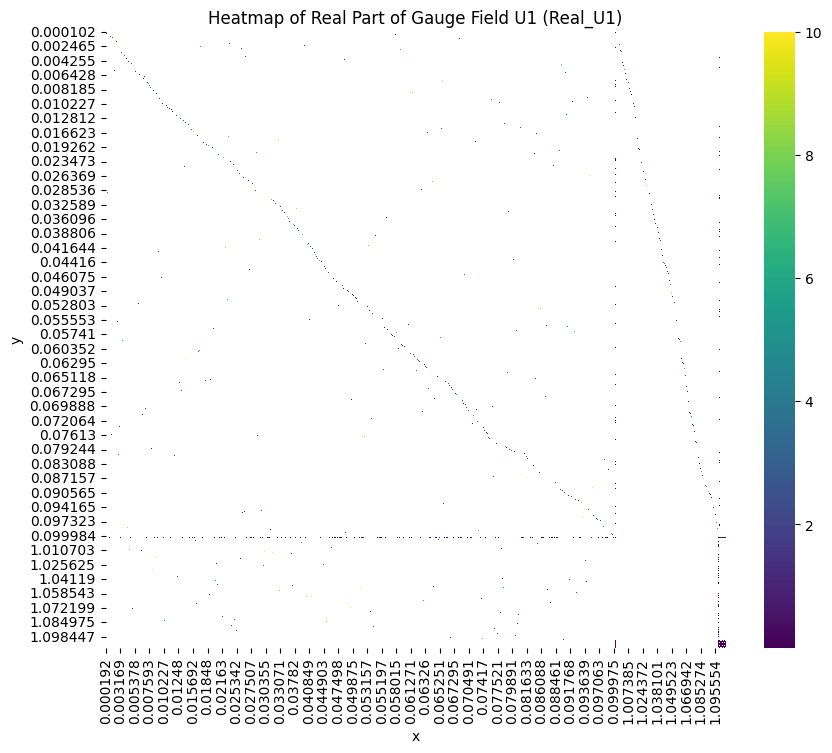

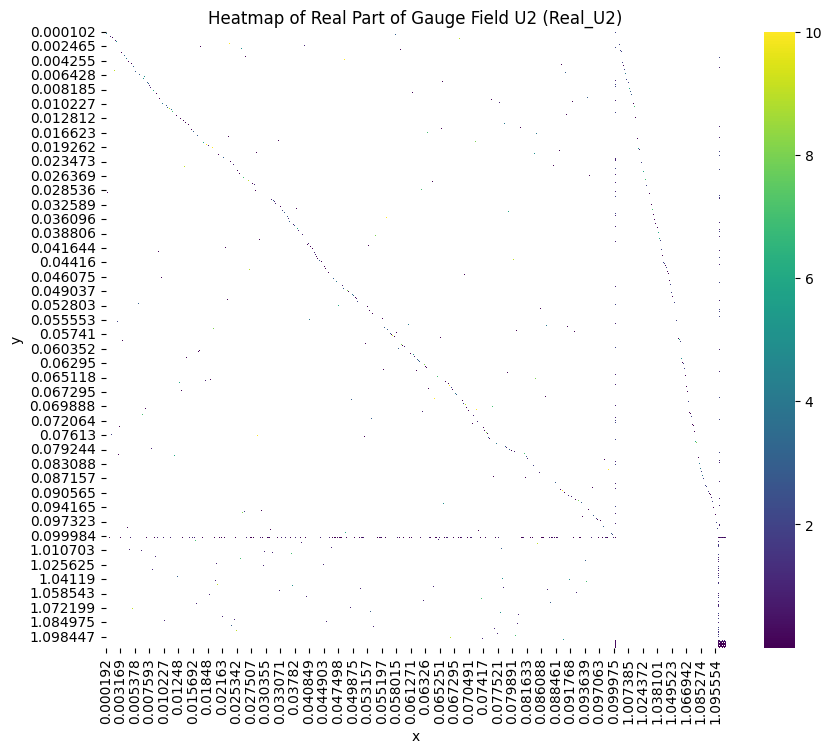

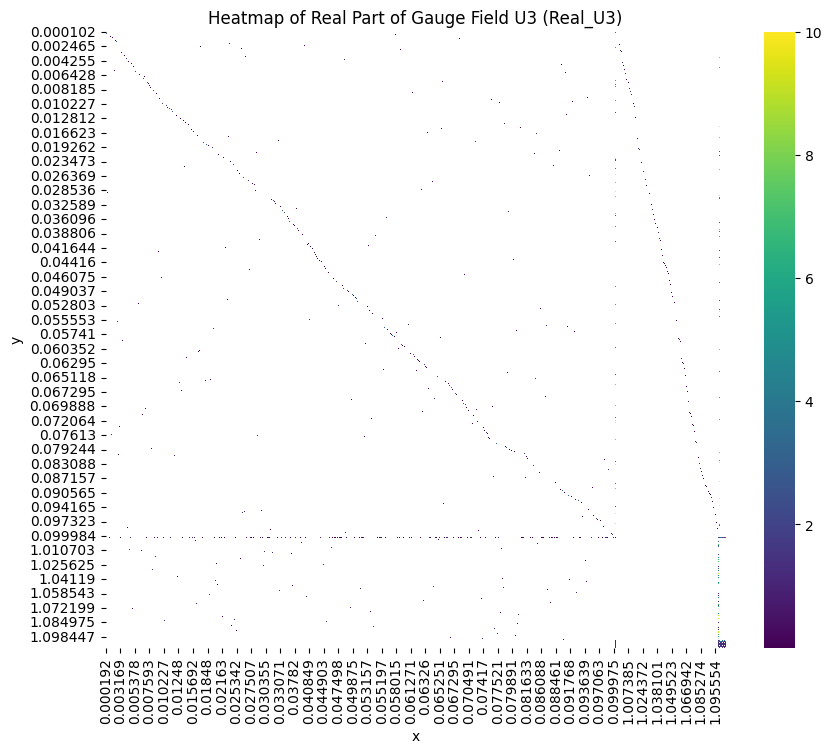

In [9]:
plot_heatmap(df_fermion, x='x', y='y', z='real_psi', title='Heatmap of Real Part of Fermion Field (Real_Psi)')
plot_heatmap(df_gauge, x='x', y='y', z='real_U1', title='Heatmap of Real Part of Gauge Field U1 (Real_U1)')
plot_heatmap(df_gauge, x='x', y='y', z='real_U2', title='Heatmap of Real Part of Gauge Field U2 (Real_U2)')
plot_heatmap(df_gauge, x='x', y='y', z='real_U3', title='Heatmap of Real Part of Gauge Field U3 (Real_U3)')